In [1]:
!pip install pykalman

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48442 sha256=4786718704a4fd693a1d31b9d084420bf7345849b4995cca94c006c9a3b3c04e
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
from pykalman import KalmanFilter

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/# DS Capstone/3 LSTM

/content/drive/MyDrive/# DS Capstone/3 LSTM


In [5]:
# Load file
file_path = './data_20y.xlsx'
dataset = pd.read_excel(file_path, header=0, index_col=False)
dataset.drop(dataset.tail(1).index,inplace=True)
dataset.drop(dataset.columns[0], axis=1, inplace=True)
df = dataset['shci_20y']

In [6]:
kf = KalmanFilter(
    transition_matrices = [1],
    observation_matrices = [1],
    initial_state_mean = 0,
    initial_state_covariance = 1,
    observation_covariance=1,
    transition_covariance=0.01
)

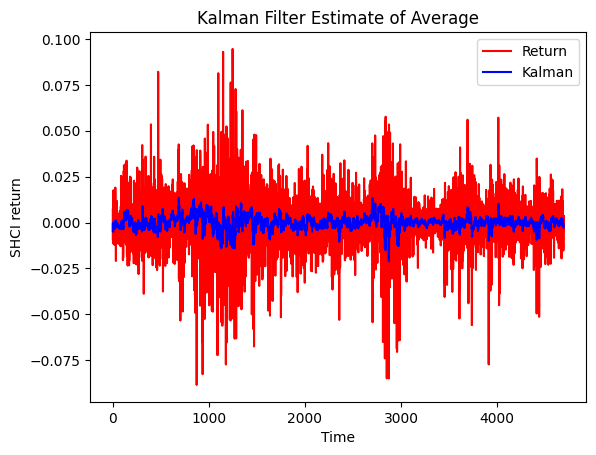

In [7]:
state_means, _ = kf.filter(df.values)
state_means = pd.Series(state_means.flatten(), index=df.index)

pyplot.plot(df, color='red', label='Return')
pyplot.plot(state_means, color='blue', label='Kalman')
pyplot.title('Kalman Filter Estimate of Average')
pyplot.xlabel('Time')
pyplot.ylabel('SHCI return')
pyplot.legend()
pyplot.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from math import sqrt
from numpy import concatenate

In [9]:
dataset.insert(loc=1, column='kalman', value=state_means)

In [10]:
dataset.drop(dataset.columns[0], axis=1, inplace=True)

In [11]:
values = dataset.values
print(dataset.head())
print(dataset.tail())

     kalman    sp_20y   nas_20y   vix_20y    rf_20y  forward_shci_20y
0 -0.004532  0.004716  0.008053 -0.000480 -0.025372          0.007598
1 -0.000435  0.015110  0.019388 -0.010557 -0.015260         -0.011346
2 -0.003250  0.003954  0.006949  0.010184  0.012154         -0.011136
3 -0.004917 -0.002404 -0.011294  0.020163  0.006304         -0.005653
4 -0.005051 -0.011977 -0.014409  0.042353 -0.021778          0.005581
        kalman    sp_20y   nas_20y   vix_20y    rf_20y  forward_shci_20y
4690 -0.001735 -0.011222 -0.012620  0.076700 -0.005647         -0.012781
4691 -0.002786 -0.007319 -0.006058  0.080950  0.005679         -0.001089
4692 -0.002624  0.008758  0.017136 -0.044433  0.025544          0.003511
4693 -0.002041  0.013049  0.021862 -0.062173 -0.001049          0.000857
4694 -0.001765  0.000017  0.003217 -0.027298 -0.028871         -0.006095


In [12]:
# Split into train, val, test sets 8:1:1
n_train = int(len(dataset) * 0.8)
train = values[:n_train, :]
val_test = values[n_train:, :]

n_val = int(len(val_test) * 0.5)
val = val_test[:n_val, :]
test = val_test[n_val:, :]

# Print the shapes of train, val, and test sets
print("Dataset shape:", dataset.shape)
print("Train set shape:", train.shape)
print("Validation set shape:", val.shape)
print("Test set shape:", test.shape)

Dataset shape: (4695, 6)
Train set shape: (3756, 6)
Validation set shape: (469, 6)
Test set shape: (470, 6)


In [13]:
# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train)
scaled_val = scaler.transform(val)
scaled_test = scaler.transform(test)

In [14]:
# Split into input and outputs
train_X, train_y = scaled_train[:, :-1], scaled_train[:, -1]
val_X, val_y = scaled_val[:, :-1], scaled_val[:, -1]
test_X, test_y = scaled_test[:, :-1], scaled_test[:, -1]

print("train_X", train_X.shape)
print("train_y", train_y.shape)
print("val_X", val_X.shape)
print("val_y", val_y.shape)
print("test_X", test_X.shape)
print("test_y", test_y.shape)

train_X (3756, 5)
train_y (3756,)
val_X (469, 5)
val_y (469,)
test_X (470, 5)
test_y (470,)


In [15]:
# Reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

Epoch 1/50
30/30 - 5s - loss: 0.3685 - val_loss: 0.2315 - 5s/epoch - 171ms/step
Epoch 2/50
30/30 - 0s - loss: 0.1131 - val_loss: 0.0600 - 188ms/epoch - 6ms/step
Epoch 3/50
30/30 - 0s - loss: 0.0628 - val_loss: 0.0525 - 339ms/epoch - 11ms/step
Epoch 4/50
30/30 - 0s - loss: 0.0614 - val_loss: 0.0522 - 314ms/epoch - 10ms/step
Epoch 5/50
30/30 - 0s - loss: 0.0614 - val_loss: 0.0520 - 320ms/epoch - 11ms/step
Epoch 6/50
30/30 - 0s - loss: 0.0613 - val_loss: 0.0517 - 314ms/epoch - 10ms/step
Epoch 7/50
30/30 - 0s - loss: 0.0612 - val_loss: 0.0515 - 218ms/epoch - 7ms/step
Epoch 8/50
30/30 - 0s - loss: 0.0611 - val_loss: 0.0513 - 209ms/epoch - 7ms/step
Epoch 9/50
30/30 - 0s - loss: 0.0611 - val_loss: 0.0510 - 226ms/epoch - 8ms/step
Epoch 10/50
30/30 - 0s - loss: 0.0610 - val_loss: 0.0508 - 250ms/epoch - 8ms/step
Epoch 11/50
30/30 - 0s - loss: 0.0609 - val_loss: 0.0505 - 224ms/epoch - 7ms/step
Epoch 12/50
30/30 - 0s - loss: 0.0608 - val_loss: 0.0503 - 349ms/epoch - 12ms/step
Epoch 13/50
30/30 - 0

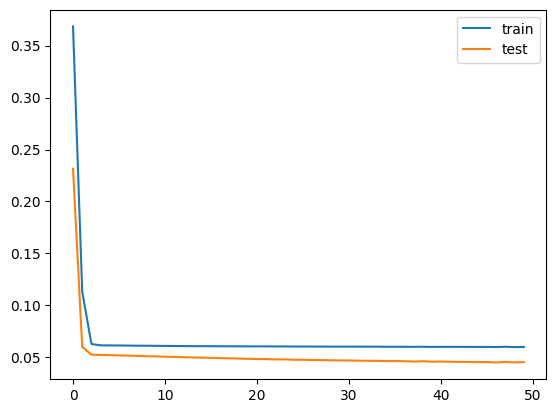

In [16]:
# Model

# def network
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=128, validation_data=(val_X, val_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [17]:
# Evaluate the model and calculate Train RMSE
train_yhat = model.predict(train_X)
train_yhat_copies_array = np.repeat(train_yhat, 6, axis=-1)
inv_train_yhat = scaler.inverse_transform(np.reshape(train_yhat_copies_array, (len(train_yhat), 6)))[:, 0]
train_original_copies_array = np.repeat(train_y, 6, axis=-1)
inv_train_y = scaler.inverse_transform(np.reshape(train_original_copies_array, (len(train_y), 6)))[:, 0]
train_rmse = sqrt(mean_squared_error(inv_train_yhat, inv_train_y))
print('Train RMSE: %.4f' % train_rmse)

118/118 [==============================] - 1s 3ms/step
Train RMSE: 0.0030


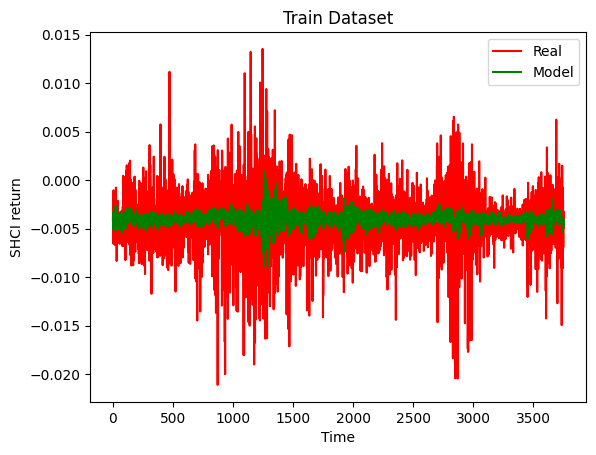

In [18]:
# Plot and check train set
pyplot.plot(inv_train_y, color='red', label='Real')
pyplot.plot(inv_train_yhat, color='green', label='Model')
pyplot.title('Train Dataset')
pyplot.xlabel('Time')
pyplot.ylabel('SHCI return')
pyplot.legend()
pyplot.show()

In [19]:
# Make predictions
yhat = model.predict(test_X)
yhat_copies_array = np.repeat(yhat, 6, axis = -1)
inv_yhat = scaler.inverse_transform(np.reshape(yhat_copies_array, (len(yhat), 6)))[:, 0]
original_copies_array = np.repeat(test_y, 6, axis=-1)
inv_y = scaler.inverse_transform(np.reshape(original_copies_array, (len(test_y), 6)))[:, 0]
rmse = sqrt(mean_squared_error(inv_yhat, inv_y))
print('Test RMSE: %.4f' % rmse)

15/15 [==============================] - 0s 3ms/step
Test RMSE: 0.0019


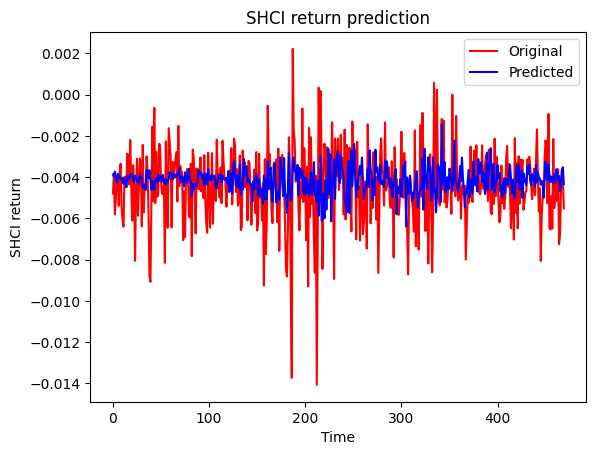

In [20]:
# plot predicted vs actual
pyplot.plot(inv_y, color='red', label='Original')
pyplot.plot(inv_yhat, color='blue', label='Predicted')
pyplot.title('SHCI return prediction')
pyplot.xlabel('Time')
pyplot.ylabel('SHCI return')
pyplot.legend()
pyplot.show()